#### Markov Chain Simulations

##### Gibbs Sampler

Makes sense in th case of multi-dimensional paramaters. Also, the joint distribution of the parameters is difficult to sample from, but it is easy to sample from the conditional ditributions. The guy said it works only in a multivariate setting. 

Suppose we need to sample from 2D normal with mean vector 0 and variance matrix 1's and correlation 0.5 that is [[1,0.5], [0.5,1]]. And assume p(x,y) is difficult to sample from but we can draw samples from p(x|y), and p(y|x). With the given parameters, p(x|y) = N(rho*y, 1-rho^2), and p(y|x) = N(rho*x, 1-rho^2).

For us 
p(x|y) = N(y/2, 3/4), p(y|x) = N(x/2, 3/4).

Procedure for Gibbs


1. Start at some (x_0, y_0)
2. Next, hold y fixed at y_0, and sample x_1 from p(x_1|y_0) (notice that to get this value we need te value of only y from the derivations in the previous paragraph).
3. The hold the current value of x fixed, and sample y_1 from (y_1|x_1)

Then we repeat the 2nd and 3rd steps as many times as we need. The first sample will be (x_0, y_0), second will be (x_1, y_1) and so on. When you take enough samples like this, it's going to look like if we sampled from the required bivariate distribution we need.


Let's do the code, let's assume the discussed distribution above.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

since we know this joint distribution alread, let's sample from the actual distribution and plot the sampled points to get an idea how thw sampled points should look like.

True samples

In [2]:
true_samples = np.random.multivariate_normal([0,0],[[1,0.5],[0.5,1]], 10000)

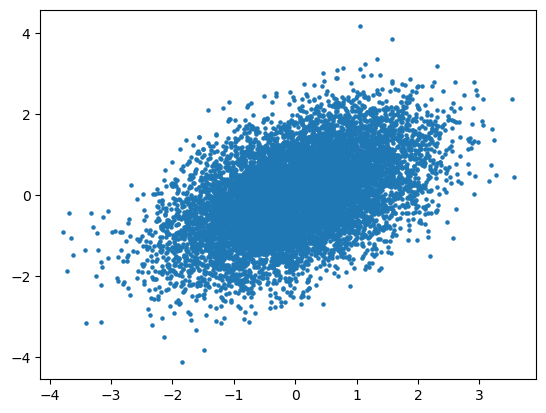

In [3]:
plt.scatter(true_samples[:,0], true_samples[:,1], s = 5)
plt.show()

Gibbs sampling

In [4]:
# initialize a dictionary with initial values
samples = {'x': [1], 'y': [-1]}

num_samples = 10000
for i in range(num_samples):
    # This takes the last value from the y dictionary
    curr_y = samples['y'][-1]
    new_x = np.random.normal(curr_y/2, np.sqrt(3/4))
    new_y = np.random.normal(new_x/2, np.sqrt(3/4))
    samples['x'].append(new_x)
    samples['y'].append(new_y)

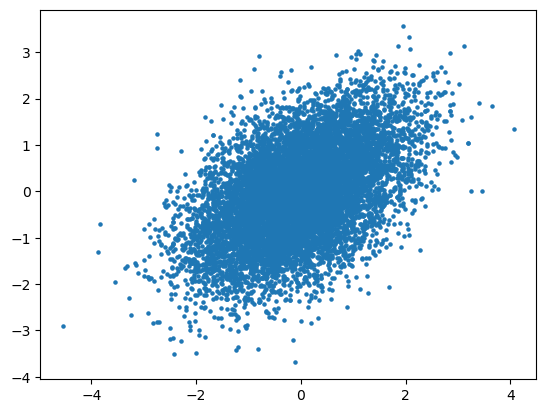

In [5]:
plt.scatter(samples['x'], samples['y'], s = 5)
plt.show()

looks similar, but let's do more checks. Let's check marginal distributions

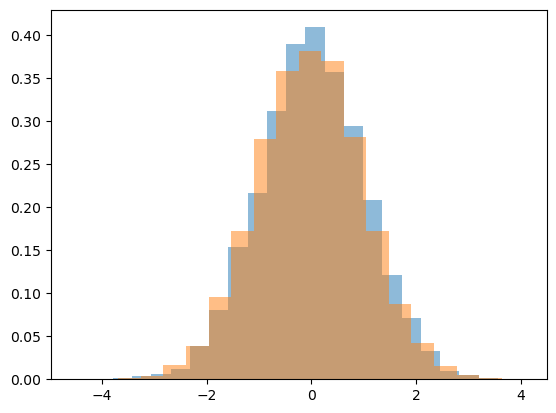

In [6]:
# for x
plt.hist(true_samples[:,0], bins = 20, density = True, alpha = 0.5)
plt.hist(samples['x'], bins = 20, density = True, alpha = 0.5)
plt.show()

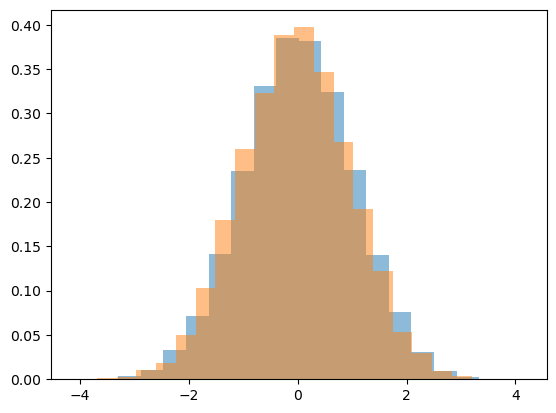

In [7]:
# for x
plt.hist(true_samples[:,1], bins = 20, density = True, alpha = 0.5)
plt.hist(samples['y'], bins = 20, density = True, alpha = 0.5)
plt.show()

Seems the samples are coming from the multivariate distribution

Looks like they are coming from the same distribution, but in fact they are not. Gibbs sampler has a sequential pattern

For x

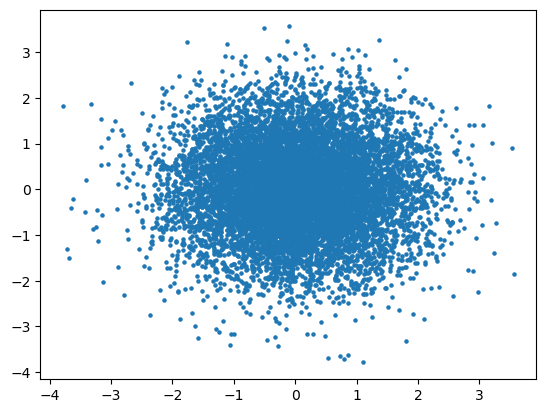

-0.007880892895096567


In [8]:
plt.scatter(true_samples[:-1,0], true_samples[1:,0], s = 5)
plt.show()
print(pearsonr(true_samples[:-1,0], true_samples[1:,0])[0])

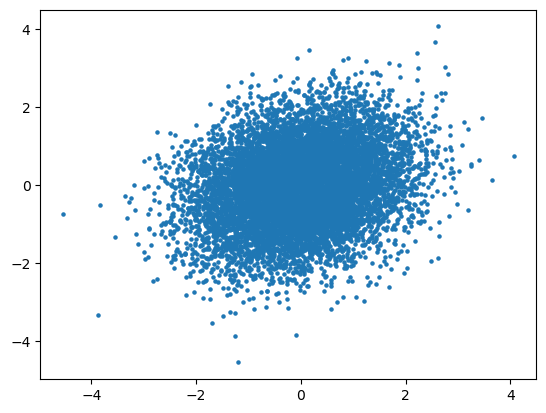

0.2402866225372975


In [9]:
plt.scatter(samples['x'][:-1], samples['x'][1:], s = 5)
plt.show()
print(pearsonr(samples['x'][:-1], samples['x'][1:])[0])

Notice the slight increase in correlation.

For y

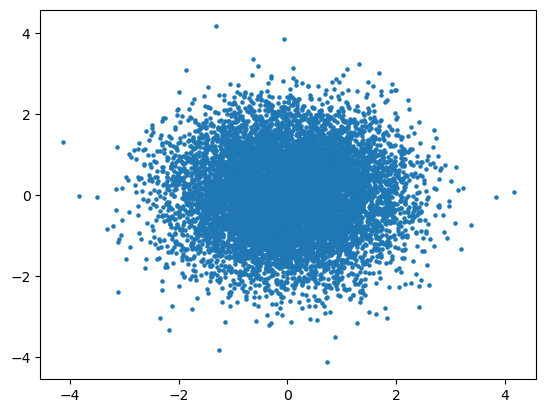

-0.0029748799297154038


In [10]:
plt.scatter(true_samples[:-1,1], true_samples[1:,1], s = 5)
plt.show()
print(pearsonr(true_samples[:-1,1], true_samples[1:,1])[0])

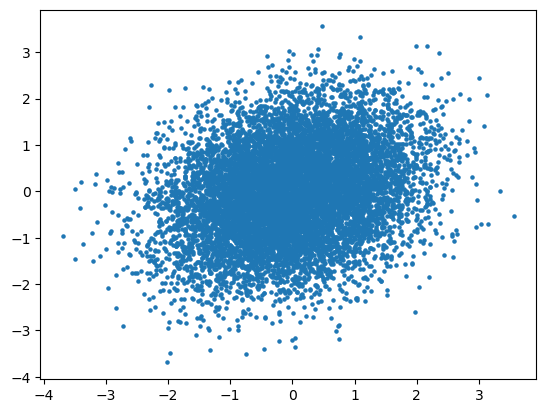

0.2509336553428083


In [11]:
plt.scatter(samples['y'][:-1], samples['y'][1:], s = 5)
plt.show()
print(pearsonr(samples['y'][:-1], samples['y'][1:])[0])